In [1]:
import pandas as pd
import csv
import os
print(os.getcwd())
all_data = []
with open('sum-interpret/output_fast.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',',)
    for row in spamreader:
        if row[-3] == '0':
            continue
        all_data.append(row)
import numpy as np


/home/jcxu


In [2]:
key = all_data[0]
data = all_data[1:]
import statistics
import random
print(key)
print(data[0])
print(len(data))

import seaborn as sns

import matplotlib.colors as mcolors

colors =[ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colors = mcolors.TABLEAU_COLORS


['', 'lm2imp', 'lm2full', 'lm2imp_cnn', 'lm2full_cnn', 'lm2attn', 'imp2lm', 'imp2full', 'imp2imp_cnn', 'imp2full_cnn', 'imp2attn', 'full2lm', 'full2imp', 'full2imp_cnn', 'full2full_cnn', 'full2attn', 'imp_cnn2lm', 'imp_cnn2imp', 'imp_cnn2full', 'imp_cnn2full_cnn', 'imp_cnn2attn', 'full_cnn2lm', 'full_cnn2imp', 'full_cnn2full', 'full_cnn2imp_cnn', 'full_cnn2attn', 'attn2lm', 'attn2imp', 'attn2full', 'attn2imp_cnn', 'attn2full_cnn', 'pos', 'tok', 't', 'T', 'prefix']
['1', '1.367868185043335', '1.6157793998718262', '2.0', '2.0', '1.9999998807907104', '1.367868185043335', '1.316935420036316', '2.0', '2.0', '1.9999998807907104', '1.6157793998718262', '1.316935420036316', '2.0', '1.9999998807907104', '1.3288244009017944', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.9999998807907104', '2.0', '1.9959638118743896', '1.9999998807907104', '1.9999998807907104', '1.3288244009017944', '2.0', '1.9959638118743896', 'NOUN', 'network', '1', '21', 'Mobile ']
1908


In [15]:
dict_pos = {}
index_of_pos = key.index('pos')
index_of_full2lm = key.index('full2lm')
index_of_lm2full = key.index('lm2full')

index_of_lm2imp = key.index('lm2imp')
index_of_imp2lm = key.index('imp2lm')

index_of_impood2imp = key.index('imp_cnn2imp')


index_of_imp2full = key.index('imp2full')
index_of_full2imp = key.index('full2imp')


index_of_tok = key.index('tok')



x = []
y = []
c = []
cnt = 0
d_color = {}
for d in data:
    pos = d[index_of_pos]
    # print(d)
    if d[index_of_imp2full] == '' or d[index_of_impood2imp] =="":
        continue
    v_lm2imp = float(d[index_of_impood2imp]) 
    v_imp2full = float(d[index_of_imp2full])
    if v_lm2imp <0.5 and v_imp2full >1.5:
        print(d[-4:])
    # if v_lm2imp>6.1 or v_imp2full>9.7:
        # continue
    x.append(v_lm2imp)
    y.append(v_imp2full)
    c.append(pos)
    # if pos in d_color:
    #     c.append(d_color[pos])
    # else:
    #     d_color[pos] = cnt
    #     cnt+=1
    #     c.append(d_color[pos])

from statistics import quantiles
print([round(q, 1) for q in quantiles(x, n=10)])
print([round(q, 1) for q in quantiles(y, n=10)])

['TV', '6', '21', 'Mobile network EE has launched a ']
['getting', '12', '19', 'Four schoolchildren have been rescued from a lift at Wembley Stadium after ']
['stuck', '13', '19', 'Four schoolchildren have been rescued from a lift at Wembley Stadium after getting ']
['hospital', '18', '25', 'A doctor has apologised to the family of a woman who died after she was refused admission to ']
['reached', '4', '26', "Great Britain's men "]
['"', '4', '21', 'The UK would be ']
['"', '6', '21', 'The UK would be ']
['at', '8', '20', 'A baby boy from Denbighshire who was born ']
['MPs', '13', '17', "Labour's shadow Welsh secretary has called for an overhaul of the way "]
['claim', '14', '17', "Labour's shadow Welsh secretary has called for an overhaul of the way MPs "]
['held', '2', '13', 'Falkirk were ']
['Raith', '7', '13', 'Falkirk were held to a draw by ']
['its', '15', '17', 'An environment body has been criticised by the environment secretary for not being clear about ']
['Brexit', '22', '23

In [6]:
from sklearn.cluster import KMeans
inp_kmeans = [[r,c] for r,c in zip(x,y)]
inp_kmeans = np.asarray(inp_kmeans)
kmeans = KMeans(n_clusters=1, random_state=0).fit(inp_kmeans)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
labels = kmeans.labels_
print(labels)

[[1.11027661 1.16783023]]
1605.3567723944734
[0 0 0 ... 0 0 0]


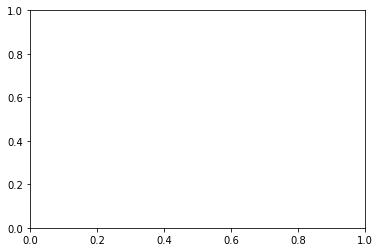

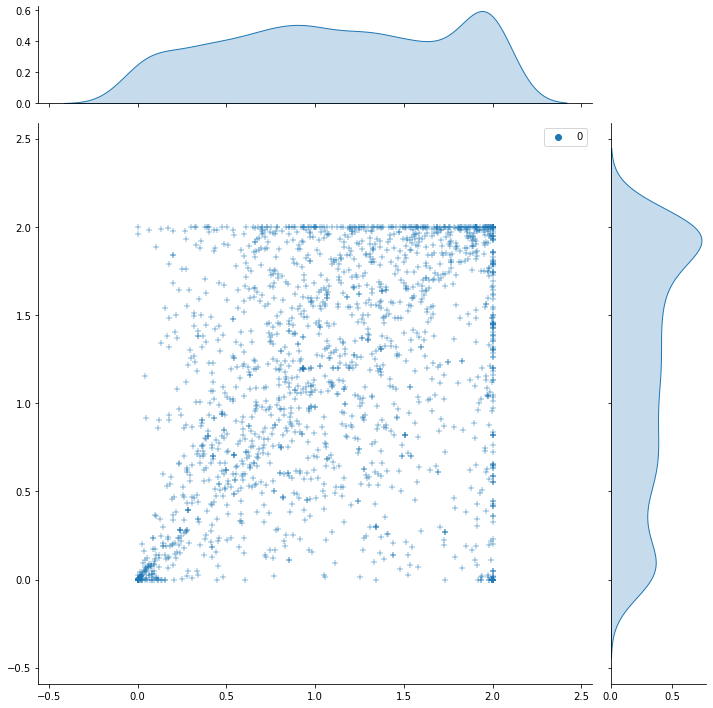

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# sns.relplot(x=x, y=y,)

# scatter = ax.scatter(x, y,s=1,c=c)
sns.jointplot(x=x,y=y,hue=labels,marginal_ticks=True,marker="+",height=10)

